In [10]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
hdu = fits.open('C:/Desktop/starburstall.fits')
hdu1 = fits.open('C:/Desktop/seyfertall.fits')

In [12]:
nii_ew = hdu[1].data['NII_Ew']
halpha_ew = hdu[1].data['H_alpha_Ew']
oiii_ew = hdu[1].data['OIII_EW']
hbeta_ew = hdu[1].data['H_beta_Ew']

nii_ew1 = hdu1[1].data['NII_Ew']
halpha_ew1 = hdu1[1].data['H_alpha_Ew']
oiii_ew1 = hdu1[1].data['OIII_EW']
hbeta_ew1 = hdu1[1].data['H_beta_Ew']

In [13]:
mask = (nii_ew > 0) & (halpha_ew > 0) & (oiii_ew > 0) & (hbeta_ew > 0)
nii_ew = nii_ew[mask]
halpha_ew = halpha_ew[mask]
oiii_ew = oiii_ew[mask]
hbeta_ew = hbeta_ew[mask]

mask1 = (nii_ew1 > 0) & (halpha_ew1 > 0) & (oiii_ew1 > 0) & (hbeta_ew1 > 0)
nii_ew1 = nii_ew1[mask1]
halpha_ew1 = halpha_ew1[mask1]
oiii_ew1 = oiii_ew1[mask1]
hbeta_ew1 = hbeta_ew1[mask1]

In [14]:
nii_ha = np.log10(nii_ew / halpha_ew)
oiii_hb = np.log10(oiii_ew / hbeta_ew)

nii_ha1 = np.log10(nii_ew1 / halpha_ew1)
oiii_hb1 = np.log10(oiii_ew1 / hbeta_ew1)


In [15]:
def kauffmann_line(x):
    return (0.61 / (x - 0.05)) + 1.3  # Kauffmann (Ka03)

def kewley_line(x):
    return (0.61 / (x - 0.47)) + 1.19  # Kewley (Ke01)

In [16]:
x_vals_ka = np.linspace(-2, 0, 500)  # Ka03 sınır aralığı
x_vals_ke = np.linspace(-2, 0.47, 500)  # Ke01 sınır aralığı

y_vals_ka = kauffmann_line(x_vals_ka)
y_vals_ke = kewley_line(x_vals_ke)

C:\Users\pilot\AppData\Local\Temp\ipykernel_7404\4001031475.py:5: RuntimeWarning: divide by zero encountered in divide
  return (0.61 / (x - 0.47)) + 1.19  # Kewley (Ke01)


In [17]:
starburst_mask = oiii_hb < kauffmann_line(nii_ha)
composite_mask = (oiii_hb >= kauffmann_line(nii_ha)) & (oiii_hb <= kewley_line(nii_ha))
seyfert_mask = oiii_hb > kewley_line(nii_ha)

In [18]:
starburst_count = np.sum(starburst_mask)
composite_count = np.sum(composite_mask)
seyfert_count = np.sum(seyfert_mask)


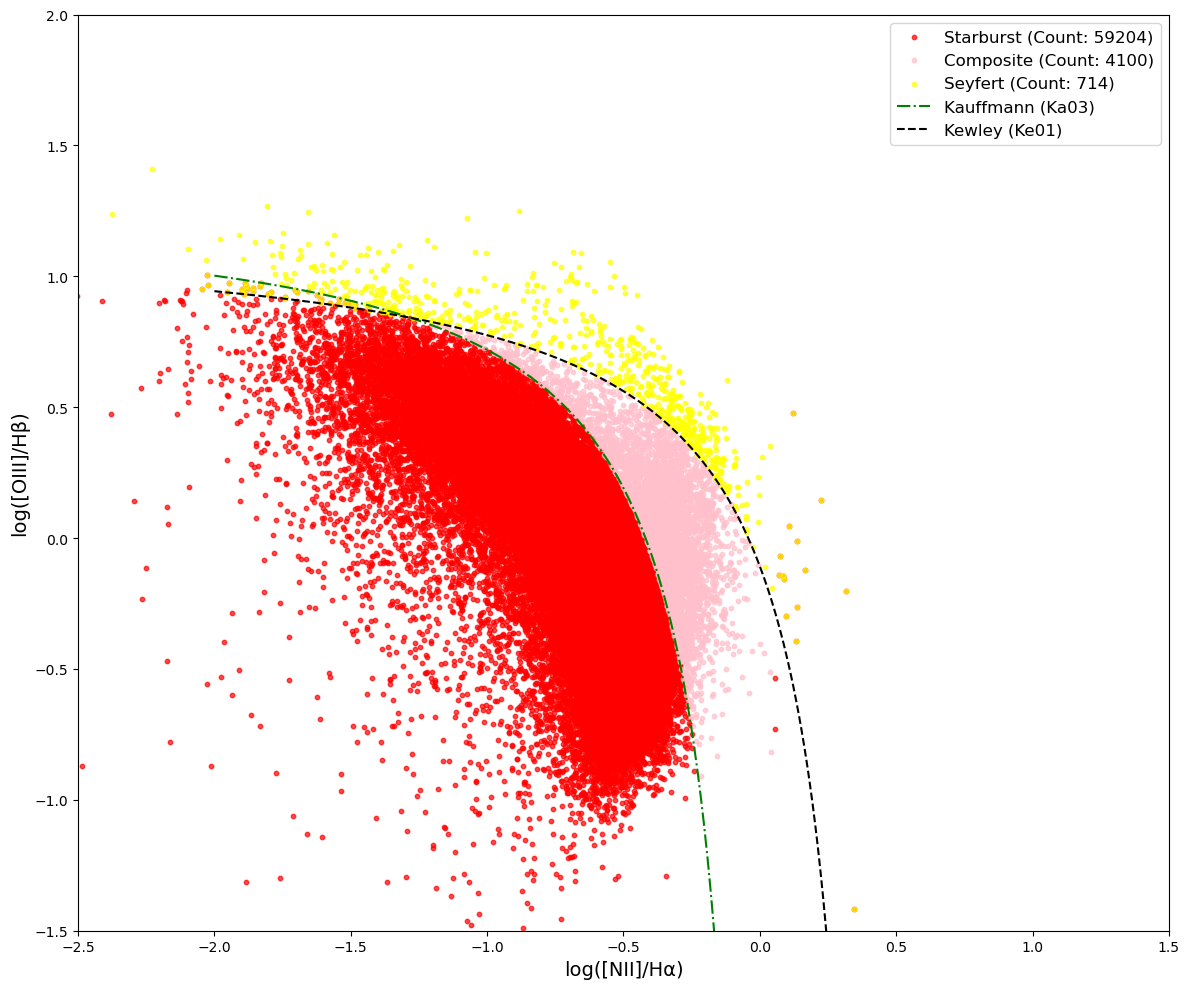

Starburst galaksi sayısı: 59204
Kompozit galaksi sayısı: 4100
Seyfert galaksi sayısı: 714


In [20]:
plt.figure(figsize=(12, 10))
plt.scatter(nii_ha[starburst_mask], oiii_hb[starburst_mask], color='red', label=f'Starburst (Count: {starburst_count})', alpha=0.7, s=10)
plt.scatter(nii_ha[composite_mask], oiii_hb[composite_mask], color='pink', label=f'Composite (Count: {composite_count})', alpha=0.7, s=10)
plt.scatter(nii_ha[seyfert_mask], oiii_hb[seyfert_mask], color='yellow', label=f'Seyfert (Count: {seyfert_count})', alpha=0.7, s=10)
plt.plot(x_vals_ka, y_vals_ka, color='green', linestyle='-.', label='Kauffmann (Ka03)')
plt.plot(x_vals_ke, y_vals_ke, color='black', linestyle='--', label='Kewley (Ke01)')


plt.xlabel('log([NII]/Hα)', fontsize=14)
plt.ylabel('log([OIII]/Hβ)', fontsize=14)
plt.xlim(-2.5, 1.5)
plt.ylim(-1.5, 2.0)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


print(f"Starburst galaksi sayısı: {starburst_count}")
print(f"Kompozit galaksi sayısı: {composite_count}")
print(f"Seyfert galaksi sayısı: {seyfert_count}")
